In [113]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import pingouin
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [114]:
train = pd.read_csv(r"C:\Users\USER\Desktop\FraudDetection\notebooks\data\fraudTrain.csv")
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


#### The test data and train data contains is_fraud as the target variable, So we will concatenate them togther to clean them, then make our predictions using train-test-split.

In [115]:
df = pd.DataFrame(train)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [116]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [117]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

#### Data Preprocessing

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [119]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [120]:
df.duplicated().sum()

0

In [121]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [122]:
#Drop unnecessary columns
#We will drop lcoation of customer as we will get the distance between Merchant and customer location later
df.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True)

In [123]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [124]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0


In [125]:
#Change date type
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed')

In [126]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month

In [127]:
#clean merchant column
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [128]:
df[['merchant']].head()

,merchant
0,Kirlin and Sons
1,Sporer-Keebler
2,"Swaniawski, Nitzsche and Welch"
3,Haley Group
4,Johnston-Casper


In [129]:
#Date of birth --> Age of customer
df['dob'] = pd.to_datetime(df['dob'],format='mixed')
df['age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year).astype(int)
#df.drop(columns='dob',inplace=True)

In [130]:
from geopy.distance import great_circle

# Calculate distance for each row using vectorized operation
df['distance_km'] = round(df.apply(lambda row: great_circle((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1), 2)


In [131]:
df.drop(columns=['lat','long','merch_lat','merch_long'],inplace=True)

In [132]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,dob,is_fraud,hour,day,month,age,distance_km
0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,personal_care,2.86,M,Columbia,29209,333497,Mechanical engineer,1968-03-19,0,12,Sunday,6,52,24.56
1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,personal_care,29.84,F,Altonah,84002,302,"Sales professional, IT",1990-01-17,0,12,Sunday,6,30,104.93


In [133]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trans_date_trans_time,555719,2020-10-02 01:54:25.166780672,2020-06-21 12:14:25,2020-08-09 06:10:27.500000,2020-10-03 00:59:48,2020-12-01 03:03:04,2020-12-31 23:59:34,NaN
cc_num,555719.0,417838695528764096.0,60416207185.0,180042946491150.0,3521417320836166.0,4635330563105903.0,4992346398065154048.0,1309836622980612608.0
amt,555719.0,69.39281,1.0,9.63,47.29,83.01,22768.11,156.745941
zip,555719.0,48842.628015,1257.0,26292.0,48174.0,72011.0,99921.0,26855.283328
city_pop,555719.0,88221.887918,23.0,741.0,2408.0,19685.0,2906700.0,300390.892061
dob,555719,1973-11-11 16:30:05.937173264,1924-10-30 00:00:00,1962-09-27 00:00:00,1975-11-30 00:00:00,1987-04-23 00:00:00,2005-01-29 00:00:00,NaN
is_fraud,555719.0,0.00386,0.0,0.0,0.0,0.0,1.0,0.062008
hour,555719.0,12.809062,0.0,7.0,14.0,19.0,23.0,6.810924
month,555719.0,9.508536,6.0,8.0,10.0,12.0,12.0,1.978205
age,555719.0,46.636237,15.0,33.0,45.0,58.0,96.0,17.418528


In [134]:
df.describe(include='object').T

,count,unique,top,freq
merchant,555719,693,Kilback LLC,1859
category,555719,14,gas_transport,56370
gender,555719,2,F,304886
city,555719,849,Birmingham,2423
job,555719,478,Film/video editor,4119
day,555719,7,Monday,115136


In [135]:
df.describe(exclude='object').T

,count,mean,min,25%,50%,75%,max,std
trans_date_trans_time,555719,2020-10-02 01:54:25.166780672,2020-06-21 12:14:25,2020-08-09 06:10:27.500000,2020-10-03 00:59:48,2020-12-01 03:03:04,2020-12-31 23:59:34,NaN
cc_num,555719.0,417838695528764096.0,60416207185.0,180042946491150.0,3521417320836166.0,4635330563105903.0,4992346398065154048.0,1309836622980612608.0
amt,555719.0,69.39281,1.0,9.63,47.29,83.01,22768.11,156.745941
zip,555719.0,48842.628015,1257.0,26292.0,48174.0,72011.0,99921.0,26855.283328
city_pop,555719.0,88221.887918,23.0,741.0,2408.0,19685.0,2906700.0,300390.892061
dob,555719,1973-11-11 16:30:05.937173264,1924-10-30 00:00:00,1962-09-27 00:00:00,1975-11-30 00:00:00,1987-04-23 00:00:00,2005-01-29 00:00:00,NaN
is_fraud,555719.0,0.00386,0.0,0.0,0.0,0.0,1.0,0.062008
hour,555719.0,12.809062,0.0,7.0,14.0,19.0,23.0,6.810924
month,555719.0,9.508536,6.0,8.0,10.0,12.0,12.0,1.978205
age,555719.0,46.636237,15.0,33.0,45.0,58.0,96.0,17.418528


#### Seggregate the dataset into numerical and categorical datatypes

In [136]:
numerical_columns = df.columns[df.dtypes != "object"]
categorical_columns = df.columns[df.dtypes == 'object']
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'city_pop', 'dob',
       'is_fraud', 'hour', 'month', 'age', 'distance_km'],
      dtype='object')
Categorical Columns: Index(['merchant', 'category', 'gender', 'city', 'job', 'day'], dtype='object')


In [137]:
df[categorical_columns].describe()

,merchant,category,gender,city,job,day
count,555719,555719,555719,555719,555719,555719
unique,693,14,2,849,478,7
top,Kilback LLC,gas_transport,F,Birmingham,Film/video editor,Monday
freq,1859,56370,304886,2423,4119,115136


In [138]:
df[numerical_columns].describe()

,trans_date_trans_time,cc_num,amt,zip,city_pop,dob,is_fraud,hour,month,age,distance_km
count,555719,5.557190e+05,555719.000000,555719.000000,5.557190e+05,555719,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000
mean,2020-10-02 01:54:25.166780672,4.178387e+17,69.392810,48842.628015,8.822189e+04,1973-11-11 16:30:05.937173264,0.003860,12.809062,9.508536,46.636237,76.105007
min,2020-06-21 12:14:25,6.041621e+10,1.000000,1257.000000,2.300000e+01,1924-10-30 00:00:00,0.000000,0.000000,6.000000,15.000000,0.120000
25%,2020-08-09 06:10:27.500000,1.800429e+14,9.630000,26292.000000,7.410000e+02,1962-09-27 00:00:00,0.000000,7.000000,8.000000,33.000000,55.290000
50%,2020-10-03 00:59:48,3.521417e+15,47.290000,48174.000000,2.408000e+03,1975-11-30 00:00:00,0.000000,14.000000,10.000000,45.000000,78.180000
75%,2020-12-01 03:03:04,4.635331e+15,83.010000,72011.000000,1.968500e+04,1987-04-23 00:00:00,0.000000,19.000000,12.000000,58.000000,98.520000
max,2020-12-31 23:59:34,4.992346e+18,22768.110000,99921.000000,2.906700e+06,2005-01-29 00:00:00,1.000000,23.000000,12.000000,96.000000,150.920000
std,NaN,1.309837e+18,156.745941,26855.283328,3.003909e+05,NaN,0.062008,6.810924,1.978205,17.418528,29.117114


#### Inferences :
* The dataset has both numerical and categorical variables.
* The dataset is long and not wide - good for computation
* There are no null and duplicate values in the dataset

Significant part: To Check correlations between numerical columns

In [139]:
df[numerical_columns].corr()

,trans_date_trans_time,cc_num,amt,zip,city_pop,dob,is_fraud,hour,month,age,distance_km
trans_date_trans_time,1.000000,-0.000810,-0.000974,0.001395,-0.000740,0.002651,-0.013066,-0.000304,0.988955,-0.002639,-0.000419
cc_num,-0.000810,1.000000,0.001963,0.041610,-0.009414,0.000664,-0.001540,-0.001137,-0.000542,0.000203,0.001570
amt,-0.000974,0.001963,1.000000,0.002310,0.002760,0.012862,0.182267,-0.029860,-0.000717,-0.012865,0.000767
zip,0.001395,0.041610,0.002310,1.000000,0.075571,-0.008452,-0.002271,0.005966,0.001401,0.008823,0.008075
city_pop,-0.000740,-0.009414,0.002760,0.075571,1.000000,0.091195,-0.004910,0.018937,-0.001117,-0.089932,0.011194
dob,0.002651,0.000664,0.012862,-0.008452,0.091195,1.000000,-0.007581,0.173664,0.001414,-0.999866,0.003140
is_fraud,-0.013066,-0.001540,0.182267,-0.002271,-0.004910,-0.007581,1.000000,0.011686,-0.011748,0.007513,0.000233
hour,-0.000304,-0.001137,-0.029860,0.005966,0.018937,0.173664,0.011686,1.000000,-0.004995,-0.173491,0.000527
month,0.988955,-0.000542,-0.000717,0.001401,-0.001117,0.001414,-0.011748,-0.004995,1.000000,-0.001408,-0.000382
age,-0.002639,0.000203,-0.012865,0.008823,-0.089932,-0.999866,0.007513,-0.173491,-0.001408,1.000000,-0.003148


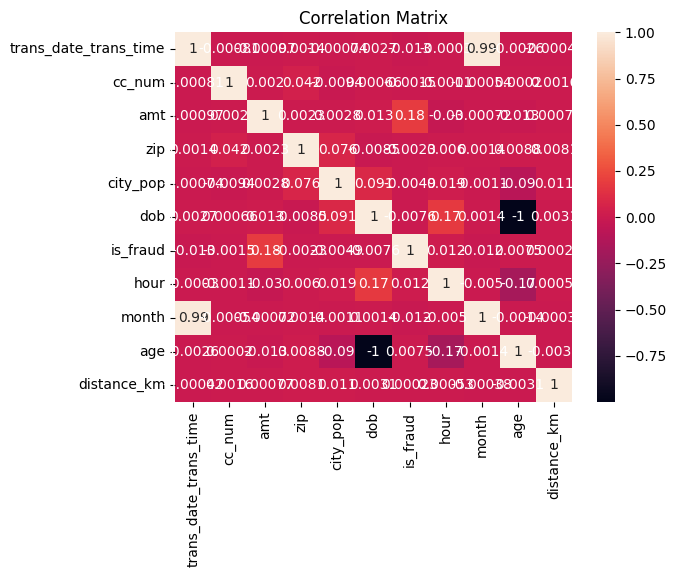

In [140]:
sns.heatmap(df[numerical_columns].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

### Get in depth in data:

Visualization for Numerical Data Types

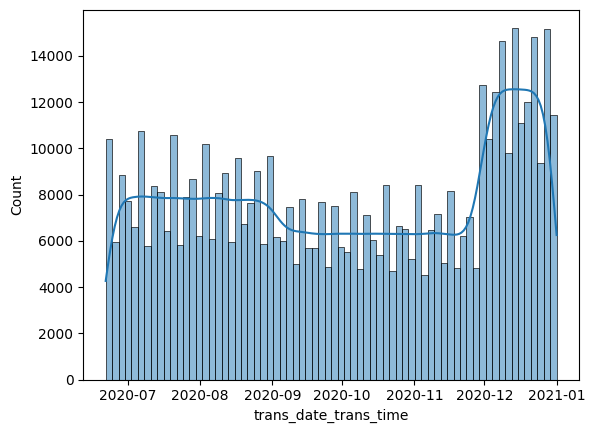

<Figure size 1700x1500 with 0 Axes>

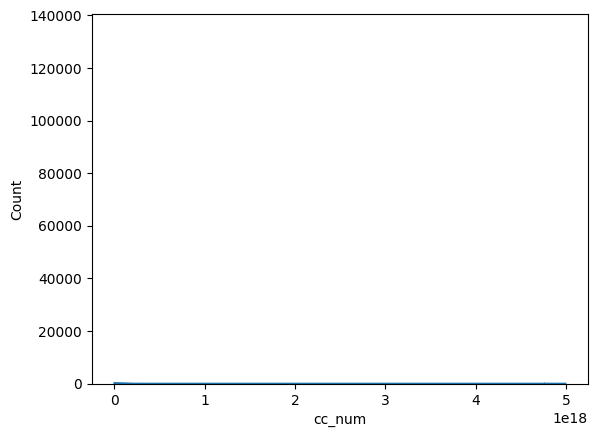

<Figure size 1700x1500 with 0 Axes>

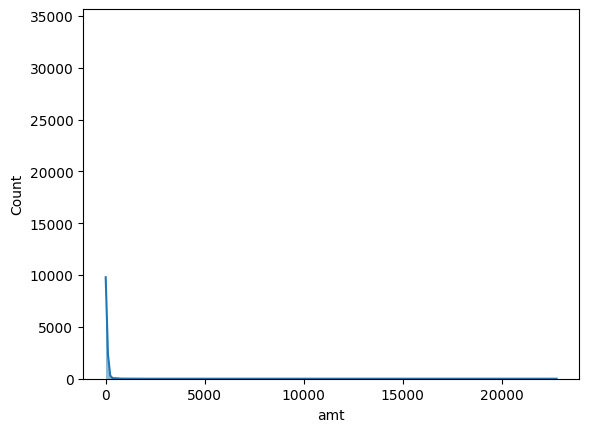

<Figure size 1700x1500 with 0 Axes>

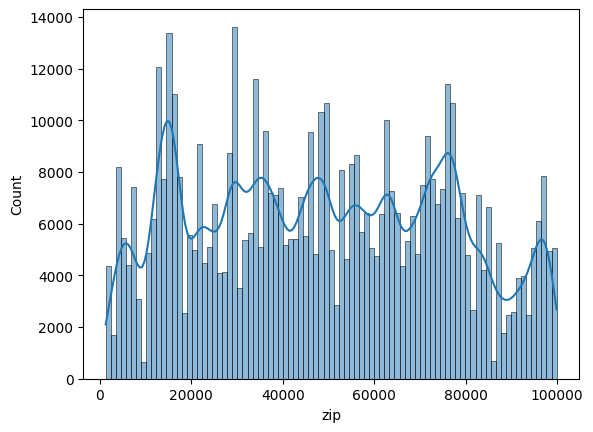

<Figure size 1700x1500 with 0 Axes>

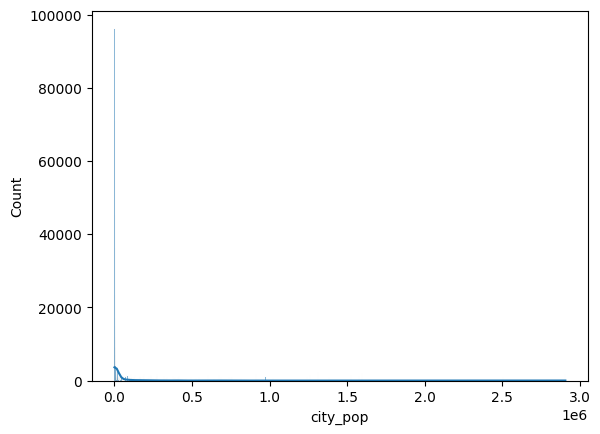

<Figure size 1700x1500 with 0 Axes>

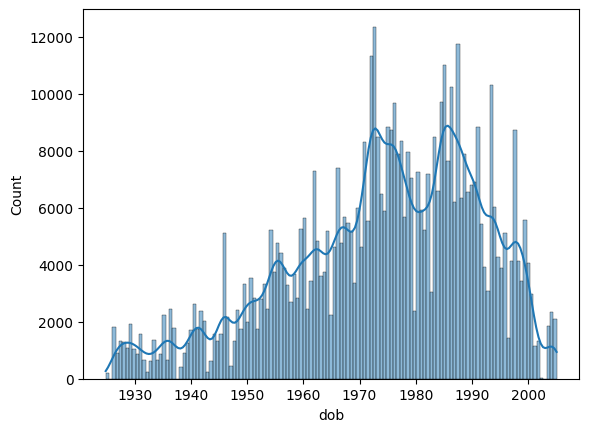

<Figure size 1700x1500 with 0 Axes>

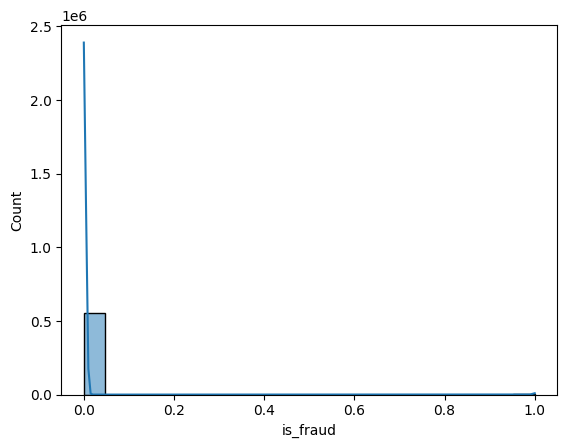

<Figure size 1700x1500 with 0 Axes>

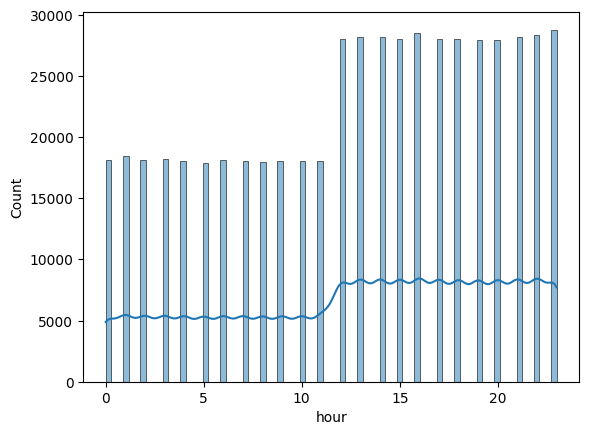

<Figure size 1700x1500 with 0 Axes>

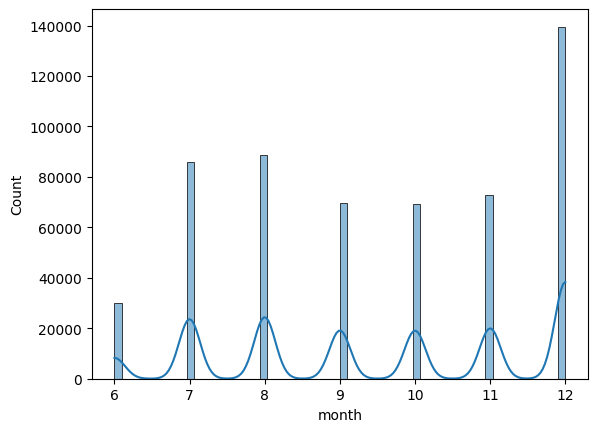

<Figure size 1700x1500 with 0 Axes>

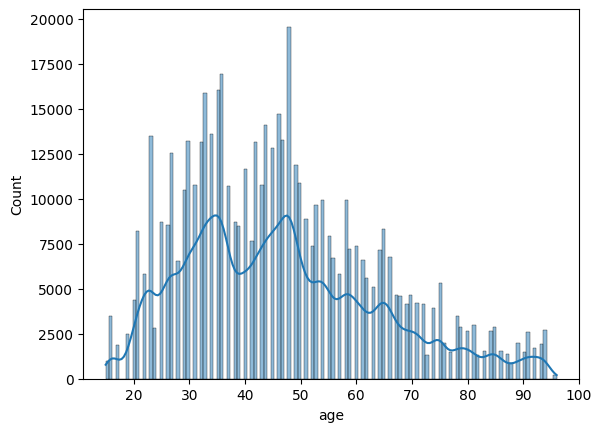

<Figure size 1700x1500 with 0 Axes>

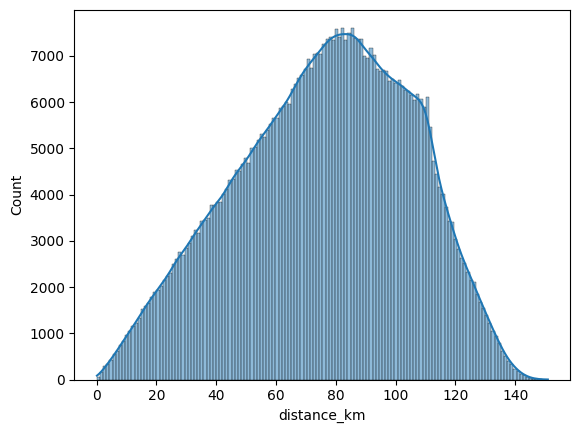

<Figure size 1700x1500 with 0 Axes>

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

x = 1
for i in numerical_columns:
    sns.histplot(data = df, x=i, kde = True)
    print("\n") 
    plt.figure(figsize=(17,15))
    plt.show()

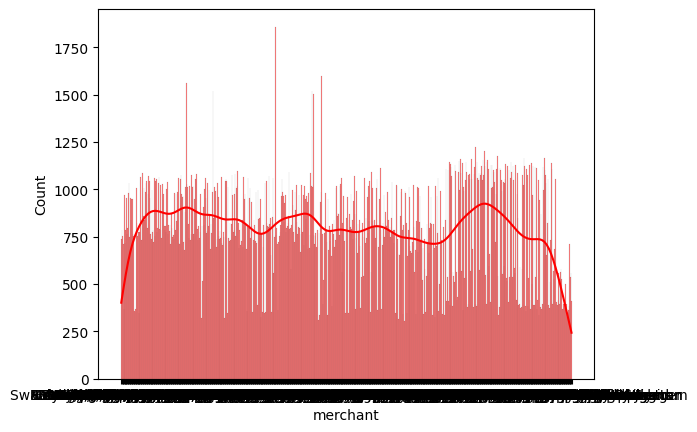

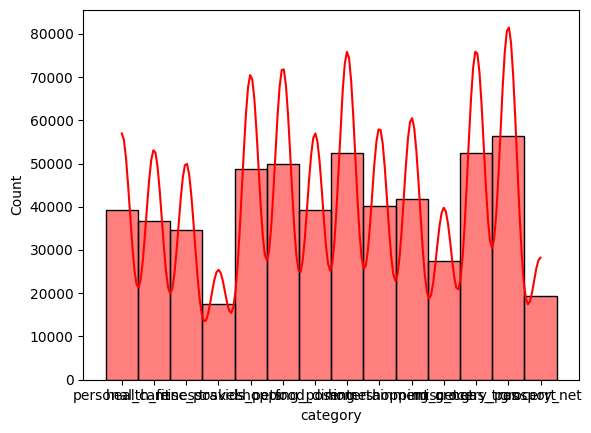

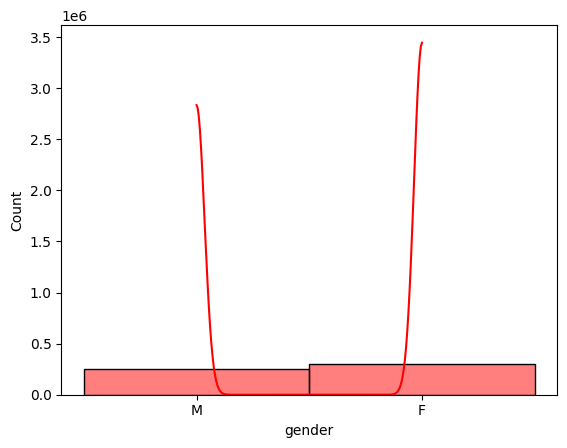

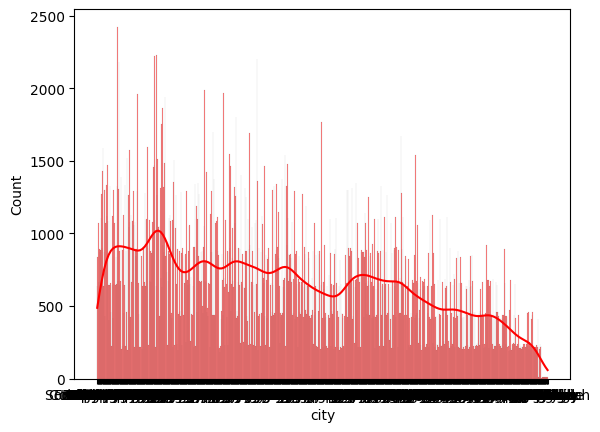

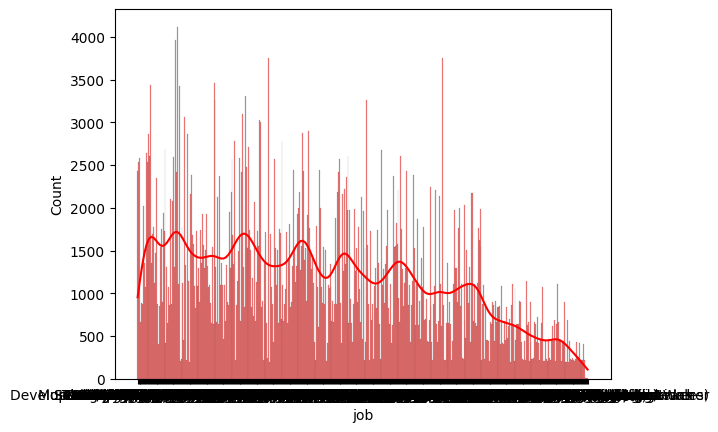

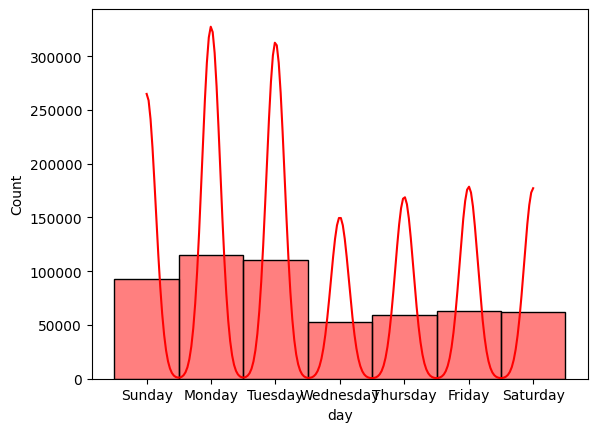

In [142]:
x = 1
for i in categorical_columns:
    sns.histplot(data = df, x=i, kde = True, color= "red")
    print("\n") 
    plt.show()

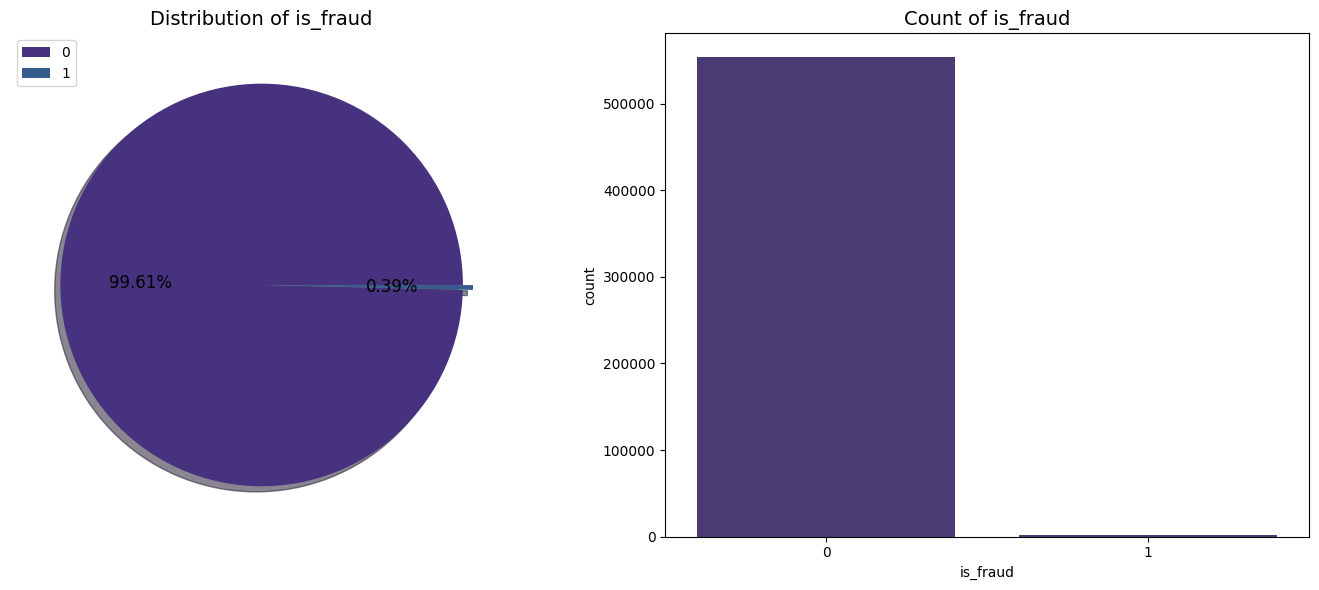

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

def pie_bar_plot(col):
    sns.set_palette('viridis')
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Pie chart
    axs[0].pie(df[col].value_counts(), autopct='%.2f%%', textprops={'fontsize': 12}, explode=[0, 0.05], shadow=True)
    axs[0].set_title(f'Distribution of {col}', fontsize=14)
    axs[0].legend(labels=df[col].value_counts().index.tolist(), loc='upper left', fontsize=10)
    
    # Count plot
    sns.countplot(data=df, x=col, ax=axs[1])
    axs[1].set_title(f'Count of {col}', fontsize=14)
    
    plt.tight_layout()
    plt.show()



pie_bar_plot('is_fraud')

* We discover that is_fraud column is imbalanced.So will fix that later

In [144]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,dob,is_fraud,hour,day,month,age,distance_km
0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,personal_care,2.86,M,Columbia,29209,333497,Mechanical engineer,1968-03-19,0,12,Sunday,6,52,24.56
1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,personal_care,29.84,F,Altonah,84002,302,"Sales professional, IT",1990-01-17,0,12,Sunday,6,30,104.93
2,2020-06-21 12:14:53,3598215285024754,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,34496,"Librarian, public",1970-10-21,0,12,Sunday,6,50,59.08


In [145]:
#We will get the time between transactions for each card
#Time=0 for every first transaction and time will be represented in hours.
df.sort_values(['cc_num', 'trans_date_trans_time'],inplace=True)
df['hours_diff_bet_trans']=((df.groupby('cc_num')[['trans_date_trans_time']].diff())/np.timedelta64(1,'h'))

In [146]:
df['hours_diff_bet_trans']

157             NaN
741        3.331667
3047      15.549167
4351       7.566111
7695      20.939722
            ...    
552584     2.243611
552892     3.056944
553559     6.035833
553560     0.028056
553883     2.119722
Name: hours_diff_bet_trans, Length: 555719, dtype: float64

In [147]:
#replacing the null values with 0
df.loc[df['hours_diff_bet_trans'].isna(),'hours_diff_bet_trans'] = 0
df['hours_diff_bet_trans'] = df['hours_diff_bet_trans'].astype(int)

In [148]:
#Handling and extracting features from cc_num
freq = df.groupby('cc_num').size()
df['cc_freq'] = df['cc_num'].apply(lambda x : freq[x])
df[['cc_num','cc_freq']].head()

,cc_num,cc_freq
157,60416207185,678
741,60416207185,678
3047,60416207185,678
4351,60416207185,678
7695,60416207185,678


In [149]:
#We got freq for each cc_num
def hist_show(col):
    fig,axs = plt.subplots(1,2,sharex=True)
    for i in [0,1]:
        sns.histplot(df[df["is_fraud"]==i][col], bins=6,ax=axs[i])

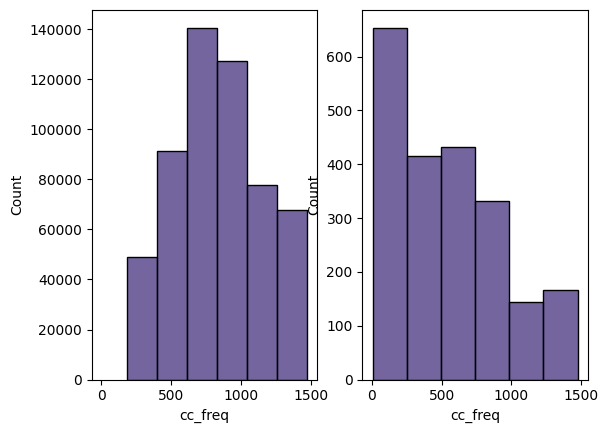

In [150]:
#Visualising cc_freq 
hist_show('cc_freq')

In [151]:
def class_det(x):
    for idx,val in enumerate(list(range(800,5000,800))):
        if x < val:
            return idx+1

In [152]:
df['cc_freq_class'] = df['cc_freq'].apply(class_det)
print(df['cc_freq_class'].unique())

[1 2]


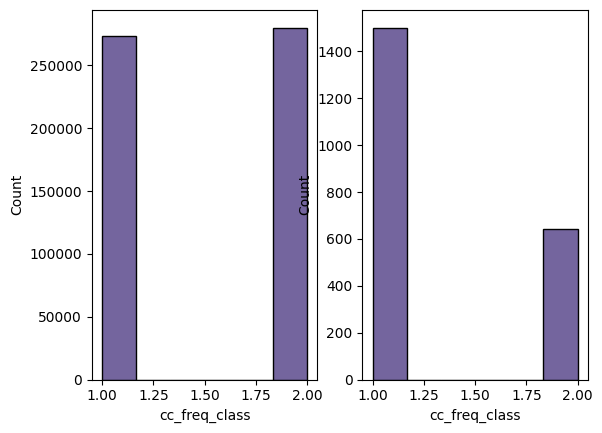

In [153]:
hist_show('cc_freq_class')

Now clearly frauds occurs more in credit cards with less use (new ones) and for genuine transactions, it follows a normal distribution.

In [154]:
#Make day feature numerical
df['day'] = df['trans_date_trans_time'].dt.weekday
df['day'] 

157       6
741       6
3047      0
4351      0
7695      1
         ..
552584    3
552892    3
553559    3
553560    3
553883    3
Name: day, Length: 555719, dtype: int32

In [155]:
#Drop unecessary columns
df.drop(columns=['cc_num','trans_date_trans_time','city_pop'],inplace=True)

In [156]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'zip', 'job', 'dob',
       'is_fraud', 'hour', 'day', 'month', 'age', 'distance_km',
       'hours_diff_bet_trans', 'cc_freq', 'cc_freq_class'],
      dtype='object')

In [157]:
#Reorder columns
df = df[['cc_freq','cc_freq_class','city','job','age','gender','merchant', 'category',
         'distance_km','month','day','hour','hours_diff_bet_trans','amt','is_fraud','split']]
df.head()

KeyError: "['split'] not in index"

In [ ]:
df.drop(columns=['split'], inplace= True)

In [ ]:
df.head()

,cc_freq,cc_freq_class,city,job,age,gender,merchant,category,distance_km,month,day,hour,hours_diff_bet_trans,amt,is_fraud
1017,1518,2,Fort Washakie,Information systems manager,33,F,"Jones, Sawayn and Romaguera",misc_net,127.61,1,1,12,0,7.27,0
2724,1518,2,Fort Washakie,Information systems manager,33,F,Berge LLC,gas_transport,110.31,1,2,8,19,52.94,0
2726,1518,2,Fort Washakie,Information systems manager,33,F,Luettgen PLC,gas_transport,21.79,1,2,8,0,82.08,0
2882,1518,2,Fort Washakie,Information systems manager,33,F,Daugherty LLC,kids_pets,87.20,1,2,12,3,34.79,0
2907,1518,2,Fort Washakie,Information systems manager,33,F,Beier and Sons,home,74.21,1,2,13,0,27.18,0


Seggregate the input and output variables

In [ ]:
X = df.drop(columns=['is_fraud'], axis = 1)
Y = df["is_fraud"]

In [ ]:
X

,cc_freq,cc_freq_class,city,job,age,gender,merchant,category,distance_km,month,day,hour,hours_diff_bet_trans,amt
1017,1518,2,Fort Washakie,Information systems manager,33,F,"Jones, Sawayn and Romaguera",misc_net,127.61,1,1,12,0,7.27
2724,1518,2,Fort Washakie,Information systems manager,33,F,Berge LLC,gas_transport,110.31,1,2,8,19,52.94
2726,1518,2,Fort Washakie,Information systems manager,33,F,Luettgen PLC,gas_transport,21.79,1,2,8,0,82.08
2882,1518,2,Fort Washakie,Information systems manager,33,F,Daugherty LLC,kids_pets,87.20,1,2,12,3,34.79
2907,1518,2,Fort Washakie,Information systems manager,33,F,Beier and Sons,home,74.21,1,2,13,0,27.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,2059,3,Mc Nabb,Audiological scientist,64,M,"Berge, Kautzer and Harris",personal_care,78.49,6,5,21,8,60.47
1295369,2059,3,Mc Nabb,Audiological scientist,64,M,Bernhard Inc,gas_transport,55.40,6,6,0,3,74.29
1295587,2059,3,Mc Nabb,Audiological scientist,64,M,"Reichert, Rowe and Mraz",shopping_net,115.67,6,6,2,2,246.56
1296206,2059,3,Mc Nabb,Audiological scientist,64,M,Jewess LLC,shopping_pos,60.51,6,6,8,5,2.62


In [ ]:
Y

1017       0
2724       0
2726       0
2882       0
2907       0
          ..
1294934    0
1295369    0
1295587    0
1296206    0
1296427    0
Name: is_fraud, Length: 1296675, dtype: int64

In [ ]:
numerical_columns = X.select_dtypes(exclude= 'object').columns
categorical_columns = X.select_dtypes(include= 'object').columns

In [ ]:
numerical_columns

Index(['cc_freq', 'cc_freq_class', 'age', 'distance_km', 'month', 'day',
       'hour', 'hours_diff_bet_trans', 'amt'],
      dtype='object')

In [ ]:
categorical_columns

Index(['city', 'job', 'gender', 'merchant', 'category'], dtype='object')

In [ ]:
df["city"].value_counts().sort_values()

city
Bruce             7
Streator          7
Karns City        7
Chattanooga       7
Vacaville         7
               ... 
Meridian       5060
Phoenix        5075
Utica          5105
San Antonio    5130
Birmingham     5617
Name: count, Length: 894, dtype: int64

In [ ]:
df["job"].value_counts().sort_values()

job
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Information officer              8
Veterinary surgeon               8
                              ... 
Materials engineer            8270
Surveyor, land/geomatics      8680
Naval architect               8684
Exhibition designer           9199
Film/video editor             9779
Name: count, Length: 494, dtype: int64

In [ ]:
df["gender"].value_counts().sort_values()

gender
M    586812
F    709863
Name: count, dtype: int64

In [ ]:
df["merchant"].value_counts().sort_values()

merchant
Hahn, Douglas and Schowalter       727
Reichert-Weissnat                  753
Medhurst, Labadie and Gottlieb     759
Treutel-King                       775
Douglas, DuBuque and McKenzie      775
                                  ... 
Boyer PLC                         3493
Kuhn LLC                          3510
Schumm PLC                        3634
Cormier LLC                       3649
Kilback LLC                       4403
Name: count, Length: 693, dtype: int64

In [ ]:
df["category"].value_counts().sort_values()

category
travel             40507
grocery_net        45452
misc_net           63287
misc_pos           79655
health_fitness     85879
personal_care      90758
food_dining        91461
entertainment      94014
shopping_net       97543
kids_pets         113035
shopping_pos      116672
home              123115
grocery_pos       123638
gas_transport     131659
Name: count, dtype: int64

Handling categorical_columns

In [ ]:
df.head()

,cc_freq,cc_freq_class,city,job,age,gender,merchant,category,distance_km,month,day,hour,hours_diff_bet_trans,amt,is_fraud
1017,1518,2,Fort Washakie,Information systems manager,33,F,"Jones, Sawayn and Romaguera",misc_net,127.61,1,1,12,0,7.27,0
2724,1518,2,Fort Washakie,Information systems manager,33,F,Berge LLC,gas_transport,110.31,1,2,8,19,52.94,0
2726,1518,2,Fort Washakie,Information systems manager,33,F,Luettgen PLC,gas_transport,21.79,1,2,8,0,82.08,0
2882,1518,2,Fort Washakie,Information systems manager,33,F,Daugherty LLC,kids_pets,87.20,1,2,12,3,34.79,0
2907,1518,2,Fort Washakie,Information systems manager,33,F,Beier and Sons,home,74.21,1,2,13,0,27.18,0


Pipeline

In [ ]:
from sklearn.impute import SimpleImputer # Missing values
from sklearn.preprocessing import StandardScaler # Feature scaling (Numerical datatypes)
from sklearn.preprocessing import OneHotEncoder # To rank the categorical variables
#Pipeline 
from sklearn.pipeline import Pipeline # To club everything together 
from sklearn.compose import ColumnTransformer # Begin the work 
from sklearn.model_selection import train_test_split

In [ ]:
numerical_columns

Index(['cc_freq', 'cc_freq_class', 'age', 'distance_km', 'month', 'day',
       'hour', 'hours_diff_bet_trans', 'amt'],
      dtype='object')

In [ ]:
categorical_columns

Index(['city', 'job', 'gender', 'merchant', 'category'], dtype='object')

In [ ]:
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")), 
        ("scaler", StandardScaler(with_mean=False))
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")), 
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("num_pipeline", num_pipeline, numerical_columns), 
        ("cat_pipeline", cat_pipeline, categorical_columns)
    ]
)



Train - Test - Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.15, random_state= 45285)

In [ ]:
datasets={'x_train':X_train,'x_test':X_test}
cols = ['hours_diff_bet_trans', 'amt']

In [ ]:
#Checking for outliers
from datasist.structdata import detect_outliers

def count_outliers(l:list):
    for col in l:
        print(f'Outliers In {col}:',len(detect_outliers(X_train,0,[col])))

In [ ]:
count_outliers(cols)

Outliers In hours_diff_bet_trans: 74018
Outliers In amt: 57146


In [ ]:
#Applying log scale
for col in cols:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

In [ ]:
count_outliers(cols)

Outliers In hours_diff_bet_trans: 188
Outliers In amt: 680


- As log transformations make the distribution more symmetric and reduce the impact of extreme values(We did not removed them).Also we can deal with these data separately,But for now: log functions are commonly used to handle right-skewed distributions. 

In [ ]:
# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

# Transform the test data
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_regression_model.predict(X_test)

In [ ]:
y_pred

Predictions: [0 0 0 ... 0 0 0]


Evaluating the models

Model: LogisticRegression
______________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193383
           1       0.86      0.27      0.41      1119

    accuracy                           1.00    194502
   macro avg       0.93      0.63      0.70    194502
weighted avg       0.99      1.00      0.99    194502



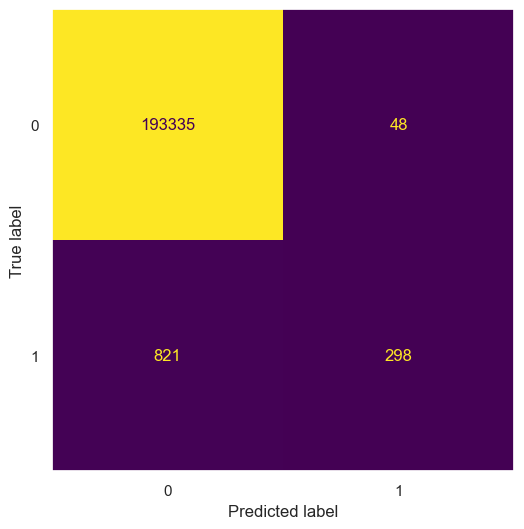

Accuracy Score: 0.9955321796176904
Running Time: 0.09 Mins
******************************


Model: DecisionTreeClassifier
______________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193383
           1       0.85      0.80      0.83      1119

    accuracy                           1.00    194502
   macro avg       0.93      0.90      0.91    194502
weighted avg       1.00      1.00      1.00    194502



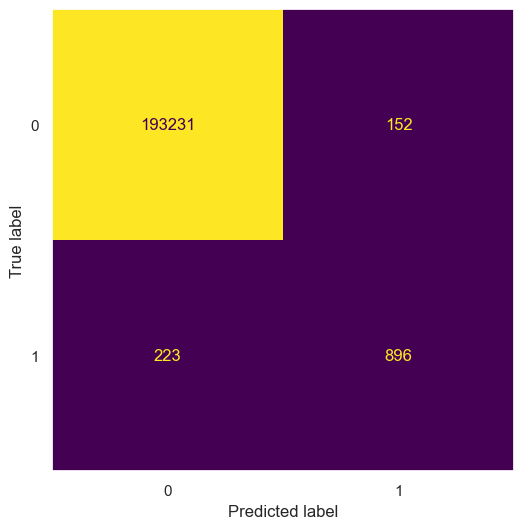

Accuracy Score: 0.9980719992596477
Running Time: 1.65 Mins
******************************




In [ ]:
from sklearn.metrics import classification_report

def evaluate_model(model, X_train, y_train, X_test, y_test):
    start = time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time()

    print('Model:', model.__class__.__name__)
    print('_' * 30)
    
    # Classification report
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cmd.plot(colorbar=False)
    plt.grid(False)
    plt.show()
    
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Running Time:', round((end - start) / 60.0, 2), 'Mins')
    print('*' * 30)
    print("\n")

# Dictionary of evaluation models
eval_models = {
    'Logistic Regression': LogisticRegression(random_state=10),
    'Decision Tree': DecisionTreeClassifier(random_state=10)
}

# Evaluate each model
for name, model in eval_models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)
